In [5]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [6]:
df = pd.read_csv("C:\\Users\hecto\PreWorks\W2\Project\Kagle/alldata.csv")

In [7]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [8]:
df.shape

(6964, 5)

In [9]:
mask = df.isnull().all(axis=1)
sum(mask)

11

In [10]:
newdf = df.dropna(axis=0, how='all')

In [11]:
print (df.shape)
print (newdf.shape)

(6964, 5)
(6953, 5)


In [12]:
newdf.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [13]:
# Simple grouping of the data
company = newdf.groupby('company')
company.size()

company
10x Genomics                 1
1199SEIU Family of Funds     1
1871                         1
23andMe                     17
24 Hour Fitness              1
                            ..
uBiome                       1
xentity corporation          5
zulily                       7
Øptimus Consulting           1
쿠팡                           2
Length: 2213, dtype: int64

In [14]:
newdf['reviews'] = newdf['reviews'].fillna(0)

<ipython-input-14-51c3faab0beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['reviews'] = newdf['reviews'].fillna(0)


In [15]:
newdf.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [16]:
test = newdf['location'][4004]
test = test.rstrip()
test

'New York, NY 10154'

In [17]:
test2 = newdf['location'][2009]
test2.rstrip()

'Washington, DC 20036'

In [18]:
re.sub('[\s+]+[\d]+[\d]+[\d]+[\d]+[\d]','',test2)

'Washington, DC'

In [19]:
newlocation = [row.rstrip() for row in newdf['location']]
newlocation = [re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in newlocation]
newdf['newlocation'] = pd.Series(newlocation,index = newdf.index)

<ipython-input-19-23c8ddabf5a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['newlocation'] = pd.Series(newlocation,index = newdf.index)


In [20]:
newdf['newlocation'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       'Boulder, CO', 'Boston, MA', 'Chicago, IL', 'Washington, DC',
       'Los Angeles, CA', 'Cambridge, MA', 'Mountain View, CA',
       'Manhattan, NY', 'New York, NY', 'Jersey City, NJ', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'New Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
    

In [21]:
area = newdf.groupby('newlocation')
areacount = area.size().to_frame()
locationcount = areacount.sort_values(0,ascending = False)
company = newdf.groupby('company')
companycount = company.size().to_frame()
companycount = companycount.sort_values(0,ascending = False)

In [22]:
companycount

,0
company,
Amazon.com,358
Ball Aerospace,187
Microsoft,137
Google,134
NYU Langone Health,77
...,...
MedStar Health,1
McKesson,1
Maxus,1


In [23]:
plt.figure(figsize=(12,6))
locationcount.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000013A010D75E0>>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='newlocation'>

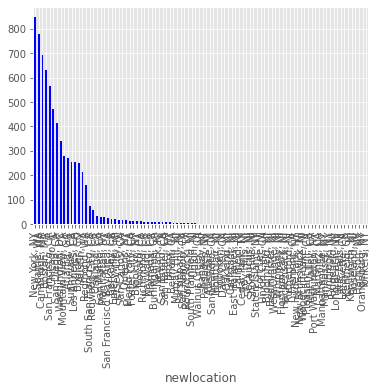

In [24]:
newdf.groupby('newlocation')['location'].count().sort_values(ascending = False).plot.bar(color = 'b')

In [25]:
newdf['description'][0]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

In [26]:
newdf.head()

,position,company,description,reviews,location,newlocation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA"


In [27]:
newdf.to_excel('cleandata.xlsx',sheet_name = 'sheet1')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://video.digi-me.com/prudential/jobs/Finance/Customer%20Office/ZP0058
If%20your%20skills%20reside%20at%20the%20intersection%20of%20analytics,%20technology,%20business%20and%20innovation,%20then%20we%20have%20a%20unique%20and%20exciting%20opportunity%20for%20you!
Prudential%20Financial%20is%20looking%20for%20a%20motivated%20Data%20Scientist%20to%20join%20our%20diverse%20team%20of%20Engineers,%20Economists,%20Computer%20Scientists,%20Mathematicians,%20Physicists,%20Statisticians%20and%20Actuaries%20tasked%20with%20mining%20our%20industry-leading%20internal%20data%20to%20develop%20new%20analytics%20capabilities%20for%20our%20businesses.
The%20role%20requires%20a%20rare%20combination%20of%20sophisticated%20analytical%20expertise;%20business%20acumen;%20strategic%20mindset;%20client%20relationship%20skills,%20project%20management;%20and%20a%20passion%20for%20generating%20business%20impact

In [29]:
from reload import sys  
reload (sys)  
sys.setdefaultencoding('utf8')

ModuleNotFoundError: No module named 'reload'

In [30]:
newdf.to_excel('cleandata.xlsx',sheet_name = 'sheet1')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://video.digi-me.com/prudential/jobs/Finance/Customer%20Office/ZP0058
If%20your%20skills%20reside%20at%20the%20intersection%20of%20analytics,%20technology,%20business%20and%20innovation,%20then%20we%20have%20a%20unique%20and%20exciting%20opportunity%20for%20you!
Prudential%20Financial%20is%20looking%20for%20a%20motivated%20Data%20Scientist%20to%20join%20our%20diverse%20team%20of%20Engineers,%20Economists,%20Computer%20Scientists,%20Mathematicians,%20Physicists,%20Statisticians%20and%20Actuaries%20tasked%20with%20mining%20our%20industry-leading%20internal%20data%20to%20develop%20new%20analytics%20capabilities%20for%20our%20businesses.
The%20role%20requires%20a%20rare%20combination%20of%20sophisticated%20analytical%20expertise;%20business%20acumen;%20strategic%20mindset;%20client%20relationship%20skills,%20project%20management;%20and%20a%20passion%20for%20generating%20business%20impact

In [31]:
test2 = newdf['newlocation'][0]

In [32]:
re.split(',',test2)[0]

'Atlanta'

In [33]:
city = [re.split(',',row)[0] for row in newdf['newlocation']]

In [34]:
state = [re.split(',',row)[1] for row in newdf['newlocation']]

In [35]:
state = map(lambda x: x.strip(),state)

In [36]:
newdf['city'] = pd.Series(city,index = newdf.index)
newdf['state'] = pd.Series(state,index = newdf.index)

<ipython-input-36-469b380c3732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['city'] = pd.Series(city,index = newdf.index)
<ipython-input-36-469b380c3732>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['state'] = pd.Series(state,index = newdf.index)


In [37]:
newdf.head()

,position,company,description,reviews,location,newlocation,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA


In [38]:
a = newdf['description'][3].lower()
python = [row.lower().count('python') for row in newdf['description']]
sum(python)

3717

In [39]:
def countkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in newalldata['description']]
    return keyword,sum(num)

In [40]:
countkeywords('machine learning')

NameError: name 'newalldata' is not defined

In [41]:
from collections import Counter
test = newdf['description'][3]
test2 = re.findall('[\w]+',test)
Counter(test2).most_common()

[('and', 27),
 ('data', 18),
 ('in', 12),
 ('the', 10),
 ('of', 9),
 ('for', 8),
 ('to', 6),
 ('database', 4),
 ('or', 4),
 ('2', 4),
 ('financial', 3),
 ('more', 3),
 ('analyst', 3),
 ('impact', 3),
 ('operational', 3),
 ('as', 3),
 ('a', 3),
 ('on', 3),
 ('performance', 3),
 ('relational', 3),
 ('databases', 3),
 ('modeling', 3),
 ('SQL', 3),
 ('status', 3),
 ('Program', 2),
 ('Atlanta', 2),
 ('GA', 2),
 ('years', 2),
 ('HOPE', 2),
 ('through', 2),
 ('work', 2),
 ('is', 2),
 ('sets', 2),
 ('reporting', 2),
 ('information', 2),
 ('field', 2),
 ('based', 2),
 ('analytical', 2),
 ('AND', 2),
 ('s', 2),
 ('that', 2),
 ('making', 2),
 ('any', 2),
 ('will', 2),
 ('methods', 2),
 ('related', 2),
 ('statistical', 2),
 ('concepts', 2),
 ('languages', 2),
 ('R', 2),
 ('Python', 2),
 ('STATA', 2),
 ('protected', 2),
 ('000', 2),
 ('00', 2),
 ('DEPARTMENT', 1),
 ('OperationsPOSITION', 1),
 ('LOCATIONS', 1),
 ('ACCOUNTABILITY', 1),
 ('President', 1),
 ('OperationsFor', 1),
 ('25', 1),
 ('Operatio

In [42]:
allstring = ""
for des in newdf['description']:
    allstring += des
allstring = allstring.lower()

In [43]:
alllist = re.findall('[\w]+',allstring)
len(alllist)
alllist[0]

'development'

In [44]:
wordcount = Counter(alllist).most_common()
wordcount[860]

('city', 671)

In [45]:
len(wordcount)

40383

In [46]:
len(set(wordcount))

40383

In [47]:
test = a[50:60]
test

'atlanta, g'

In [48]:
test = [str(single) for single in test]   
test2 = list(re.findall('[a-z]+',single) for single in test)

In [49]:
description = newdf['description']

In [50]:
description = list(description)

In [51]:
len(description)

6953

In [52]:
test2

[['a'], ['t'], ['l'], ['a'], ['n'], ['t'], ['a'], [], [], ['g']]

In [53]:
import itertools
test3 = list(itertools.chain(*test2))

In [54]:
test3

['a', 't', 'l', 'a', 'n', 't', 'a', 'g']

In [55]:
allwords = [str(single) for single in a]   
allwords = list(re.findall('[a-z]+',single) for single in allwords)
allwords[0:10]

[['d'], ['e'], ['p'], ['a'], ['r'], ['t'], ['m'], ['e'], ['n'], ['t']]

In [56]:
finalwords = list(itertools.chain(*allwords))
len(finalwords)

2473

In [57]:
newlist = set(finalwords)
len(newlist)

26

In [58]:
wordstest = pd.DataFrame(columns = newlist, index = range(0,len(description)))

In [59]:
wordstest.head()
#wordstest.shape

,c,z,q,r,y,m,b,i,l,g,...,x,n,w,f,a,h,p,j,t,k
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
b = finalwords[0]

In [61]:
[i in description[0] for i in finalwords]
        

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [62]:
for i in finalwords:
    if i in description[0]:
        wordstest.set_value(0,i,1)
    else:
        wordstest.set_value(0,i,0)

AttributeError: 'DataFrame' object has no attribute 'set_value'

In [68]:
wordstest.set_value(0,'and',1)

AttributeError: 'DataFrame' object has no attribute 'set_value'

In [69]:
wordstest['python']

KeyError: 'python'

In [70]:
newalldata = pd.read_csv("alldata2.csv")
newalldata = newalldata.dropna(axis=0, how = 'all')
sum(newalldata.isnull().all(axis=1))

FileNotFoundError: [Errno 2] No such file or directory: 'alldata2.csv'

In [ ]:
allstring = ""
type(newalldata['description'][0])

In [ ]:
for single in newalldata['description']:
    single = str(single)
    allstring += single

In [ ]:
allstring = allstring.lower()

In [ ]:
from collections import Counter

In [ ]:
alltemp = re.findall('[\w]+',allstring)
wordcount = Counter(alltemp).most_common()

In [ ]:
wordcount[1000]

In [ ]:
str(wordcount[0])
'and' in str(wordcount[0])

In [ ]:
wordcount[0:836]

In [ ]:
newalldata.shape

In [ ]:
len(set(wordcount))

In [ ]:
phraselen = 2
vector3 = []
for i in range(0,len(alltemp)-(phraselen-1)):
    temp_phrase = alltemp[i] + ' ' + alltemp[i+1]
    vector3 += [temp_phrase]
phrase_freq = Counter(vector3)
phrase_freq_vector = list(phrase_freq.most_common())


In [ ]:
phrase_freq_vector[1000:1200]

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print stop_words

In [ ]:
list(stop_words)

In [ ]:
len(set(alltemp))

In [ ]:
emptylist = []
for word in alltemp:
    if word not in list(stop_words):
        emptylist += [word]

In [ ]:
len(emptylist)

In [ ]:
len(alltemp)

In [ ]:
Counter(emptylist).most_common()

In [ ]:
Counter(alltemp).most_common()

In [ ]:
wordcountlist = [str(word) for word in wordcount]

In [ ]:
emptylist = ""
for word in newalldata['description'][0]:
    if word not in stop_words:
        emptylist += word

In [ ]:
from nltk.tokenize import word_tokenize
words = word_tokenize(newalldata['description'][0])
filtered_string = []
for w in words:
    if w not in stop_words:
        filtered_string.append(w)

In [ ]:
Counter(filtered_string).most_common()

In [ ]:
all_words_in_list = re.findall('[\w+]',allstring)

In [ ]:
len(allstring)

In [ ]:
[re.sub('[\d]+','',single_des) for single_des in newalldata['description']}

In [ ]:
re.sub('[\d]+','',newalldata['description'][0])

In [ ]:
empty = []
for single in newalldata['description']:
    single = str(single).lower()
    empty.append([re.sub('[\d]+','',single)])
    

In [ ]:
import itertools

In [ ]:
newempty = []
for i in empty:
    newempty.append(word_tokenize(str(i)))
newempty = list(itertools.chain(*newempty))

In [ ]:
filtered_str = []
for w in newempty:
    if w not in stop_words:
        filtered_str.append(w)

In [ ]:
newfilter = [re.sub('[\W]+','',word) for word in filtered_str]

In [ ]:
filterwords = [word.lower() for word in newfilter]

In [ ]:
words_frequency = Counter(filterwords).most_common()

In [ ]:
words_frequency[0:100]

In [ ]:
countkeywords('python')

In [ ]:
keywordslist = ['python','sql','java','scala','excel',
        'aws','hadoop','spark','linux','tableau','sas',
               'linux','sas','hive','oracle','perl',
               'mysql','matlab','html','tensorflow','spss','mongodb']

In [ ]:
keywords = []
for word in keywordslist:
     keywords.append(countkeywords(str(word)))

In [ ]:
keywords

In [ ]:
countkeywords('R')

In [ ]:
def countkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in newalldata['description']]
    return keyword,sum(num)

In [ ]:
keywords.append(countkeywords('R'))

In [ ]:
keywords.append(countkeywords('C++'))

In [ ]:
keywords.append(countkeywords('BI'))

In [ ]:
keywords

In [ ]:
countkeywords('microsoft')

In [ ]:
countkeywords('powerpoint')

In [ ]:
countkeywords('ppt')

In [ ]:
countkeywords('redshift')

In [ ]:
countkeywords('scikit')

In [ ]:
keyskills = ['machine learning','data analysis','data visualization',
            'modeling','statistical analysis','research','deep learning'
            'optimization','decision tree','logistic','random forest',
            'a/b testing','web scraping','neural network','interpersonal skills',
            'communication skills']

In [ ]:
for i in keyskills:
    print countkeywords(i)

In [63]:
countkeywords('optimization')

NameError: name 'newalldata' is not defined

In [ ]:
countkeywords('decision tree')

In [64]:
countkeywords('logistic')

NameError: name 'newalldata' is not defined

In [65]:
countkeywords('random forest')

NameError: name 'newalldata' is not defined

In [ ]:
countkeywords('a/b testing')

In [ ]:
countkeywords('web scraping')

In [ ]:
countkeywords('neural network')

In [ ]:
countkeywords('interpersonal skills')

In [ ]:
countkeywords('communication skills')

In [ ]:
countkeywords('bachelor')

In [ ]:
countkeywords('computer science')

In [66]:
countkeywords('statistics')

NameError: name 'newalldata' is not defined

In [67]:
countkeywords('degree')

NameError: name 'newalldata' is not defined

In [ ]:
degree_vector = []
for string in newalldata['description']:
    string = str(string)
    if 'degree' in string:
        index = string.index('degree')
        if index < 100:
            degree_vector.append(string[0:index+100])
        else:
            degree_vector.append(string[index-100:index+100])
    else:
        degree_vector.append('No degree requirement')

In [ ]:
Counter(degree_vector).most_common()

In [ ]:
['degree' in string for string in newalldata['description'][0:10]]

In [ ]:
newalldata['description'][5].index('degree')

In [ ]:
newalldata['description'][5][28:128]

In [ ]:
def countlowerkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in degree_vector]
    return keyword,sum(num)

In [ ]:
def countupperkeywords(keyword):
    num = [str(row).count(keyword) for row in degree_vector]
    return keyword,sum(num)

In [ ]:
degreelist = ['master',"master's",'phd','ph.d','bachelor',"bachelor's",
             'high school']

In [ ]:
for i in degreelist:
    print countlowerkeywords(i)

In [ ]:
majorlist = ['computer science','data science','statistics','quantitative',
            'mathematics','economics','liberal arts','science','buisness',
            'engineer','engineering','psychology','biology','medicine',
            'marketing','business analysis','chemical engineering','chemistry',
            'public health','public relationship','years','experience']

In [ ]:
keywords = []
word_count = []
for i in majorlist:
    keywords.append(countlowerkeywords(i)[0])
    word_count.append(countlowerkeywords(i)[1])

In [ ]:
majors = pd.DataFrame(keywords,word_count,index=len(keywords))

In [ ]:
majors

In [ ]:
countupperkeywords('BA')

In [ ]:
countupperkeywords('BS')

In [ ]:
countupperkeywords('MA')

In [ ]:
countupperkeywords('MS')

In [ ]:
countupperkeywords('Ph.D')

In [ ]:
countupperkeywords('PhD')

In [ ]:
countlowerkeywords('experience')

In [ ]:
d = {'col1':[1,2],'col2':[3,4]}
pd.DataFrame(data = d)

In [ ]:
words_frequency[1:100]

In [ ]:
words_frequency[800]

In [ ]:
test = [re.findall('[a-z]+',str(word)) for word in words_frequency]

In [ ]:
import itertools
words= list(itertools.chain(*test))[1:10]

In [ ]:
countlist = []
numberlist = []
def countwords():
    for word in words:
        for string in newalldata['description']:
            string = str(string)
            numberlist.append(string.count(word))
        countlist.append("{}:{}".format(str(word),numberlist))
    return countlist

In [ ]:
finalwordslist = countwords()

In [ ]:
finalwordslist[0]

In [ ]:
from wordcloud import WordCloud
import nltk
import re
from textblob import TextBlob

#sample.generate('',join(newalldata['description'][0]))

In [ ]:
sample = TextBlob(newalldata['description'][0]).ngrams(3)

In [ ]:
string = allstring

In [ ]:
len(allstring)

In [ ]:
sample = WordCloud(background_color="white", max_words=2000)
sample.generate(allstring)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [ ]:
degree_vector

In [ ]:
degreestring = ""
for i in degree_vector:
    degreestring += " " + i

In [ ]:
degreestring

In [ ]:
sample = WordCloud(background_color="white", max_words=2000)
sample.generate(degreestring)

In [ ]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [ ]:
positionstring = ""
for i in newalldata['position']:
    i = str(i)
    positionstring += " " + i

In [ ]:
positionstring = re.sub("[\d]+","",positionstring)

In [ ]:
sample.generate(positionstring)

In [ ]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()